# <center>Feedforward and Backpropagation</center>
## <center>Inclass Project 2 - MA4144</center>

## Index No : 200285E

This project contains 10 tasks/questions to be completed, some require written answers. Open a markdown cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

***

## Outline of the project

The aim of the project is to build a Multi Layer perceptron (MLP) model from scratch for binary classification. That is given an input $x$ output the associated class label $0$ or $1$.

In particular, we will classify images of handwritten digits ($0, 1, 2, \cdots, 9$). For example, given a set of handwritten digit images that only contain two digits (Eg: $1$ and $5$) the model will classify the images based on the written digit.

For this we will use the MNIST dataset (collection of $28 \times 28$ images of handwritten digits) - you can find additional information about MNIST [here](https://en.wikipedia.org/wiki/MNIST_database).

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f7/MnistExamplesModified.png" width="250">

***


Use the below cell to use any include any imports

In [808]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Section 1: Preparing the data

In [700]:
#Load the dataset as training and testing, then print out the shapes of the data matrices

(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


**Q1.** In the following cell write code to display $5$ random images in train_X and it's corresponding label in train_y. Each time it is run, you should get a different set of images. The imshow function in the matplotlib library could be useful. Display them as [grayscale images](https://en.wikipedia.org/wiki/Grayscale).

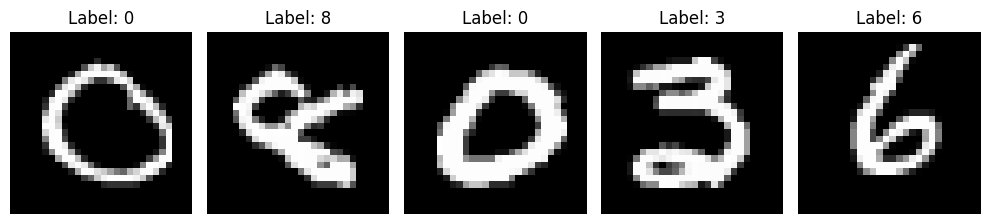

In [701]:
#TODO Code to display 5 random handritten images from train_X and corresponting labels from train_y

# Generate 5 random indices from the training set
random_indices = np.random.choice(train_X.shape[0], 5, replace=False)

# Plot the images and corresponding labels
plt.figure(figsize=(10, 5))

for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)  
    plt.imshow(train_X[idx], cmap='gray')  # Display the image in grayscale
    plt.title(f"Label: {train_y[idx]}")
    plt.axis('off')  

plt.tight_layout()
plt.show()


**Q2.** Given two digits $d_1$ and $d_2$, both between $0$ and $9$, in the following cell fill in the function body to extract all the samples corresponding to $d_1$ or $d_2$ only, from the dataset $X$ and labels $y$. You can use the labels $y$ to filter the dataset. Assume that the $i$th image $X[i]$ in $X$ is given by $y[i]$. The function should return the extracted samples $X_{extracted}$ and corresponding labels $y_{extracted}$. Avoid using for loops as much as possible, infact you do not need any for loops. numpy.where function should be useful.

In [702]:
def extract_digits(X, y, d1, d2):

    assert d1 in range(0, 10), "d1 should be a number between 0 and 9 inclusive"
    assert d2 in range(0, 10), "d2 should be a number between 0 and 9 inclusive"
    
    mask = np.isin(y, [d1, d2])

    X_extracted = X[mask]
    y_extracted = y[mask]

    return (X_extracted, y_extracted)



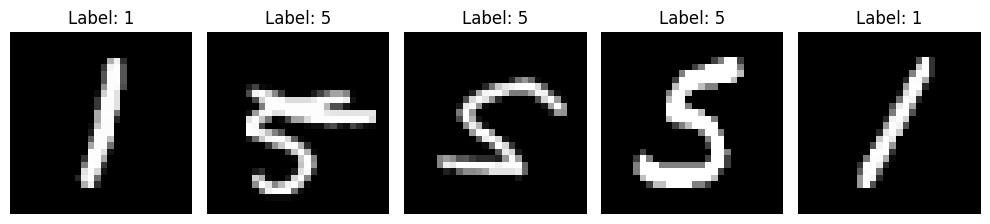

In [703]:
# Plot 5 random images of digits 1 and 5 which are extracted from the dataset
d1, d2 = 1, 5
X_extracted, y_extracted = extract_digits(train_X, train_y, d1, d2)

num_samples = 5


random_indices = np.random.choice(X_extracted.shape[0], num_samples, replace=False)

plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_samples, i + 1)  
    plt.imshow(X_extracted[idx], cmap='gray') 
    plt.title(f"Label: {y_extracted[idx]}")
    plt.axis('off')  

plt.tight_layout()
plt.show()


**Q3.** Both the training dataset train_X and test_y is a 3 dimensional numpy array, each image occupies 2 dimensions. For convenience of processing data we usually comvert each $28 \times 28$ image matrix to a vector with $784$ entries. We call this process **vectorize images**.

Once we vectorize the images, the vectorized data set would be structured as follows: $i$th row will correspond to a single image and $j$th column will correspond to the $j$th pixel value of each vectorized image. However going along with the convention we discussed in the lecture, the input to the MLP model will require that the columns correspond to individual images. Hence we also require a transpose of the vectorized results.

The pixel values in the images will range from $0$ to $255$. Normalize the pixel values between $0$ and $1$, by dividing each pixel value of each image by the maximum pixel value of that image. Simply divide each column of the resulting matrix above by the max of each column. 

<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTdN_8m9FEqjqAB07obTmB6gNc7S2rSoGBYaA&s"></center>

Given a dataset $X$ of size $N \times 28 \times 28$, in the following cell fill in the function to do the following in order;
1. Vectorize the dataset resulting in dataset of size $N \times 784$.
2. Transpose the vectorized result.
3. Normalize the pixel values of each image.
4. Finally return the vectorized, transposed and normalized dataset $X_{transformed}$.

Again, avoid for loops, functions such as numpy.reshape, numpy.max etc should be useful.

In [704]:
def vectorize_images(X):

    X_vectorized = X.reshape(X.shape[0], -1)  # Reshape the images to a vector

    X_vectorized = X_vectorized.T  # Transpose the matrix so that each column is an image

    X_max = np.max(X_vectorized, axis=0) # Find the maximum pixel value for each image

    X_vectorized = X_vectorized / (X_max + 1e-10)  # Normalize the pixel values

    return(X_vectorized)

In [705]:
# Vectorize the images
train_X_transformed = vectorize_images(train_X)

print(train_X_transformed.shape)  

(784, 60000)


**Q4.** In the following cell write code to;

1. Extract images of the digits $d_1 = 1$ and $d_2 = 5$ with their corresponding labels for both the training set (train_X, train_y) and testing set (test_X, test_y) separately.
2. Then vectorize the data, tranpose the result and normlize the images.
3. Store the results after the final transformations in numpy arrays train_X_1_5, train_y_1_5, test_X_1_5, test_y_1_5
4. Our MLP will output only class labels $0$ and $1$ (not $1$ and $5$), so create numpy arrays to store the class labels as follows:
   $d_1 = 1$ -> class label = 0 and $d_2 = 5$ -> class label = 1. Store them in the arrays named train_class_1_5, test_class_1_5.

Use the above functions you implemented above to complete this task. In addtion, numpy.where could be useful. Avoid for loops as much as possible.

In [785]:
# Define the digits to extract
d1, d2 = 1, 5

# Extract the digits from the training and testing sets
train_X_1_5, train_y_1_5 = extract_digits(train_X, train_y, d1, d2)
test_X_1_5, test_y_1_5 = extract_digits(test_X, test_y, d1, d2)

# Vectorize the images
train_X_1_5 = vectorize_images(train_X_1_5)
test_X_1_5 = vectorize_images(test_X_1_5)

# Create the binary labels
train_class_1_5 = np.where(train_y_1_5 == d1, 0, 1)
test_class_1_5 = np.where(test_y_1_5 == d1, 0, 1)

# Display the shapes of the final arrays to verify
print("train_X_1_5 shape:", train_X_1_5.shape)
print("train_y_1_5 shape:", train_y_1_5.shape)
print("test_X_1_5 shape:", test_X_1_5.shape)
print("test_y_1_5 shape:", test_y_1_5.shape)
print("train_class_1_5 shape:", train_class_1_5.shape)
print("test_class_1_5 shape:", test_class_1_5.shape)


train_X_1_5 shape: (784, 12163)
train_y_1_5 shape: (12163,)
test_X_1_5 shape: (784, 2027)
test_y_1_5 shape: (2027,)
train_class_1_5 shape: (12163,)
test_class_1_5 shape: (2027,)


In [786]:
# Print the first 10 labels and their corresponding class labels
num_samples_to_print = 10

print("First", num_samples_to_print, "samples of train_y_1_5 with corresponding train_class_1_5:")
for i in range(num_samples_to_print):
    print(f"Original Label: {train_y_1_5[i]}, Class Label: {train_class_1_5[i]}")


First 10 samples of train_y_1_5 with corresponding train_class_1_5:
Original Label: 5, Class Label: 1
Original Label: 1, Class Label: 0
Original Label: 1, Class Label: 0
Original Label: 1, Class Label: 0
Original Label: 5, Class Label: 1
Original Label: 1, Class Label: 0
Original Label: 1, Class Label: 0
Original Label: 1, Class Label: 0
Original Label: 5, Class Label: 1
Original Label: 1, Class Label: 0


## Section 2: Implementing MLP from scratch with training algorithms.

Now we will implement code to build a customizable MLP model. The hidden layers will have the **Relu activation function** and the final output layer will have **Sigmoid activation function**.

**Q5.** Recall the following about the activation functions:
1. Sigmoid activation: $y = \sigma(z) = \frac{1}{1 + e^{-z}}$.
2. Derivative of Sigmoid: $y' = \sigma'(z) = \sigma(z) (1 - \sigma(z)) = y(1-y)$
3. ReLu activation: $y = ReLu(z) = max(0, z)$
4. Derivative of ReLu: $y' = ReLu'(z) = \begin{cases} 0 \; \textrm{if } z < 0 \\ 1 \; \textrm{otherwise} \end{cases} = \begin{cases} 0 \; \textrm{if } y = 0 \\ 1 \; \textrm{otherwise} \end{cases}$

In the following cell implement the functions to compute activation functions Sigmoid and ReLu given $z$ and derivatives of the Sigmoid and ReLu activation functions given $y$. Note that the input to the derivative functions is $y$ not $z$.

In practice the input will not be just single numbers, but matrices. So functions or derivatives should be applied elementwise on matrices. Again avoid for loops, use the power of numpy arrays - search for numpy's capability of doing elementwise computations.

Important: When implementing the sigmoid function make sure you handle overflows due to $e^{-z}$ being too large. To avoid you can choose to set the sigmoid value to 'the certain appropriate value' if $z$ is less than a certain good enough negative threshold. If you do not handle overflows, the entire result will be useless fince the MLP will just output Nan (not a number) for evry input at the end.

In [772]:
def sigmoid(Z):
    Z = np.clip(Z, -500, 500)
    sigma = 1 / (1 + np.exp(-Z))
    return(sigma)

def deriv_sigmoid(Y):
    sigma_prime = sigmoid(Y) * (1 - sigmoid(Y))
    return(sigma_prime)

def ReLu(Z):
    relu = np.maximum(0, Z)    
    return(relu)

def deriv_ReLu(Y):
    relu_prime = np.where(Y > 0, 1, 0)
    return(relu_prime)



**Q6.** The following piece of code defines a simple MLP architecture as a Python class and subsequent initialization of a MLP model. <font color='blue'>Certain lines of code contains commented line numbers. Write a short sentence for each such line explaining its purpose. Feel free to refer to the lecture notes or any resources to answers these question. In addition, explain what the Y, Z, W variables refer to and their purpose</font>

In [773]:
class NNet:
    def __init__(self, input_size = 784, output_size = 1, batch_size = 1000, hidden_layers = [500, 250, 50]):
        self.Y = []
        self.Z = []
        self.W = []
        self.input_size = input_size
        self.output_size = output_size
        self.batch_size = batch_size
        self.hidden_layers = hidden_layers

        layers = [input_size] + hidden_layers + [output_size]
        L = len(hidden_layers) + 1
    
        for i in range(1, L + 1):
            self.Y.append(np.zeros((layers[i], batch_size)))                        #line1
            self.Z.append(np.zeros((layers[i], batch_size)))                        #Line2
            self.W.append(2*(np.random.rand(layers[i], layers[i-1] + 1) - 0.5))     #Line3

**Answers** (to write answers edit this cell)

(i) What does the Y, Z, W variables refer to and their purpose?

Y(Activation Output) : This variable stores the activation values of each neuron in the network after applying the activation function (like ReLU or Sigmoid). These values are propagated forward through the network to the next layer. For example, in a ReLU-activated hidden layer, Y=ReLU(Z).

Z(Pre-Activation Value): Z stores the pre-activation values (weighted sums) before applying the activation function. This is calculated as 𝑍 = 𝑊⋅𝑋+𝑏, where 𝑊 is the weight matrix, 𝑋 is the input, and 𝑏 is the bias.

W(Weights): W contains the weight matrices that represent the connections between neurons in adjacent layers. These weights are adjusted during training as part of the learning process. Each matrix in W defines how neurons from one layer connect to the next, including the bias term. The network learns these weights during backpropagation to minimize the classification error.

(ii) Line1: This line initializes the activation values for layer i as a matrix of zeros. Each column in the matrix corresponds to the activations of a neuron in the layer for a single data point in the batch.

(iii) Line2: This line initializes the pre-activation values (also known as "weighted input") for layer i. This matrix will hold the values before applying the activation function for each neuron in the layer.

(iv) Line3: This line initializes the weight matrix 
𝑊 for layer i with random values. The weights are initialized between -0.5 and 0.5, and the extra +1 in the second dimension accounts for the bias term. This matrix will connect layer i−1 to layer i

**Q7.** Now we will implement the feedforward algorithm. Recall from the lectures that for each layer $l$ there is input $Y^{(l-1)}$ from the previous layer if $l > 1$ and input data $X$ if $l = 1$. Then we compute $Z^{(l)}$ using the weight matrix $W^{(l)}$ as follows from matrix multiplication:

$Z^{(l)} = W^{(l)} Y^{(l-1)}$

Make sure that during multiplication you add an additional row of one's to $Y^{(l-1)}$ to accommodate the bias term. However, the rows of ones should not permanently remain on $Y^{(l-1)}$. <font color='blue'>Explain what the bias term is and how adding a row of one's help with the bias terms.</font> During definition above the weight matrices are initialised to afford this extra bias term, so no change to either $Z^{(l)}$ or $W^{(l)}$ is needed.

Next compute $Y^{(l)}$, the output of layer $l$ by activation through sigmoid.

$Y^{(l)} = \sigma(Z^{(l)})$

The implemented feedforward algorithm should take in a NNet model and an input matrix $X$ and output the modified MLP model - the $Y$'s and $Z$'s computed should be stored in the model for the backpropagation algorithm.

As usual avoid for loops as much as possible, use the power of numpy. However, you may use a for loop to iterate through the layers of the model.

In [788]:
def feedforward(model, X):
    model.Y[0] = X
    
    for i in range(1, len(model.W)):
    
        Y_prev_temp = np.vstack([model.Y[i - 1], np.ones(model.Y[i - 1].shape[1])])
    
        model.Z[i - 1] = np.dot(model.W[i - 1], Y_prev_temp)
    
        if i < len(model.W) - 1:
            model.Y[i] = ReLu(model.Z[i - 1])
        else:
            model.Y[i] = sigmoid(model.Z[i - 1])
        
    return model


**Answer** (to write answers edit this cell)

Explain what the bias term is and how adding a row of one's help with the bias terms.

### Bias Term:
The bias term in a neural network acts as an additional constant added to the linear combination of weights and inputs before passing through the activation function. This bias allows the network to fit the data better, especially in cases where the data cannot be modeled well with a function that passes through the origin. The bias ensures that neurons can have more flexibility, shifting the activation function to fit the data better.

### Adding a Row of Ones:
Adding a row of ones to the input matrix \( Y^{(l-1)} \) essentially represents the bias term. When multiplying the weight matrix \( W^{(l)} \) with the input, the extra row in \( W^{(l)} \) corresponds to the bias. Adding ones as an extra row ensures that the bias term is accounted for in the multiplication without needing to handle it separately.


**Q8.** Now we will implement the backpropagation algorithm. The cost function $C$ at the end is given by the square loss.

$C = \frac{1}{2} ||Y^{(L)} - Y||^{2}$, where $Y^{(L)}$ is the final output vector of the feedforward algorithm and $Y$ is the actual label vector associated with the input $X$.

At each layer $l = 1, 2, \cdots, L$ we compute the following (note that the gradients are matrices with the same dimensions as the variable to which we derivating with respect to):

1. Gradient of $C$ with respect to $Z^{(l)}$ as <br> $\frac{\partial C}{\partial Z^{(l)}} = deriv(A^{(l)}(Z^{(l)})) \odot \frac{\partial C}{\partial Y^{(L)}} $, <br> where $A^{(l)}$ is the activation function of the $l$th layer, and we use the derivative of that here. The $\odot$ refers to the elementwise multiplication.

2. Gradient of $C$ with respect to $W^{(l)}$ as <br> $\frac{\partial C}{\partial W^{(l)}} = \frac{\partial C}{\partial Z^{(l)}} (Y^{(l-1)})^{T}$ <br> this is entirely matrix multiplication.

3. Gradient of $C$ with respect to $Y^{(l-1)}$ as <br> $\frac{\partial C}{\partial Y^{(l-1)}} = (W^{(l)})^{T} \frac{\partial C}{\partial Z^{(l)}}$ <br> this is also entirely matrix multiplication.

4. Update weights by: <br> $W^{(l)} \leftarrow W^{(l)} - \eta \frac{\partial C}{\partial W^{(l)}}$, <br> where $\eta > 0$ is the learning rate.

The loss derivative (the gradient of $C$ with respect to $Y^{(L)}$) at the last layer is given by:

$\frac{\partial C}{\partial Y^{(L)}} = Y^{(L)} - Y$

By convention we consider $Y^{(0)} = X$, the input data.

Based on the backpropagation algorithm implement the backpropagation method in the following cell. Remember to temporarily add a row of ones to $Y^{(l-1)}$ when computing $\frac{\partial C}{\partial W^{(l)}}$ as we discussed back in the feedforward algorithm. Make sure you avoid for loops as much as possible.

The function takes in a NNet model, input data $X$ and the corresponding class labels $Y$. learning rate can be set as desired.

In [789]:
def backpropagation(model, X, Y, eta=0.01):
    L = len(model.W) - 1 

    model = feedforward(model, X)

    dC_dY_l = model.Y[-1] - Y
    
    for i in range(L, 0, -1):
        if i == L:
            dC_dZ_l = deriv_sigmoid(model.Z[i - 1]) * dC_dY_l
        else:
            dC_dZ_l = dC_dY_l_prev * deriv_ReLu(model.Z[i - 1])
        
        Y_prev_temp = np.vstack([model.Y[i - 1], np.ones(model.Y[i - 1].shape[1])])
        dC_dW_l = np.dot(dC_dZ_l, Y_prev_temp.T)
        
        dC_dY_l_prev = np.dot(model.W[i - 1].T, dC_dZ_l)
        dC_dY_l_prev = dC_dY_l_prev[:-1, :]  
    
        model.W[i - 1] -= eta * dC_dW_l
    
    return model

**Q9.** Now implement the training algorithm.

The training method takes in training data $X$, actual label $Y$, number of epochs, batch_size, learning rate $\eta > 0$. The training will happen in epochs. For each epoch, permute the data columns of both $X$ and $Y$, then divide both $X$ and $Y$ into mini batches each with the given batch size. Then run the feedforward and backpropagation for each such batch iteratively.

At the end of each iteration, keep trach of the cost $C$ and the $l_2$-norm of change in each weight matrix $W^{(l)}$.

At the end of the last epoch, plot the variation cost $C$ and change in weight matrices. Then return the trained model.



In [790]:
def train_NNet(X, Y, epochs=20, batch_size=1000, eta=0.01):
    model = NNet(batch_size=batch_size)
    
    cost_list = []  
    weight_change_epoch_list = []  
    
    for epoch in range(epochs):
        perm = np.random.permutation(X.shape[1])
        X = X[:, perm]
        Y = Y[perm]
        
        epoch_cost = 0  
        epoch_weight_change = 0  
        num_batches = 0
        
        for i in range(0, X.shape[1], batch_size):
            X_batch = X[:, i:i+batch_size]
            Y_batch = Y[i:i+batch_size]
        
            old_weights = [np.copy(W) for W in model.W]
            
            model = feedforward(model, X_batch)
            model = backpropagation(model, X_batch, Y_batch, eta)
            
            cost = np.sum((model.Y[-1] - Y_batch)**2) / 2
            epoch_cost += cost
            
            delta_W_norm = sum(np.linalg.norm(model.W[l] - old_weights[l]) for l in range(len(model.W)))
            epoch_weight_change += delta_W_norm
            
            num_batches += 1
            
        avg_epoch_cost = epoch_cost / num_batches
        avg_epoch_weight_change = epoch_weight_change / num_batches
        
        cost_list.append(avg_epoch_cost)
        weight_change_epoch_list.append(avg_epoch_weight_change)
        
        print(f"Epoch {epoch+1}/{epochs}, Cost: {avg_epoch_cost}, Avg. Weight Change: {avg_epoch_weight_change}")
    
    # Plot the cost function over epochs
    plt.figure(figsize=(10, 5))
    
    # Plot cost
    plt.subplot(1, 2, 1)
    plt.plot(cost_list, label="Cost")
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.title("Cost Function over Epochs")
    plt.legend()
    
    # Plot weight change
    plt.subplot(1, 2, 2)
    plt.plot(weight_change_epoch_list, label="Weight Change", color='orange')
    plt.xlabel("Epoch")
    plt.ylabel("Avg. Weight Change")
    plt.title("Weight Change over Epochs")
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return model

## Section 3: Evaluation using test data

The following function will evaluate then return an accuracy score and the predicted labels for your model. Do not change anything here.

In [778]:
def test_model(test_data, test_labels, model, d1, d2):
    
    L = len(model.hidden_layers) + 1
    
    Y = test_data
    for i in range(L):
        Z = np.matmul(model.W[i], np.append(Y, np.array([np.ones(Y.shape[1])]), axis = 0))
        if i < L - 1:
            Y = ReLu(Z)
        else:
            Y = sigmoid(Z)
    
    Y = Y[0]
    Y = np.where(Y >= 0.5, 1, 0)
    Y_predicted = Y

    acc = accuracy_score(test_labels, Y_predicted)

    return(acc, Y_predicted)

    

**Q10.** Use this test_model function to evaluate your model with the $1$ and $5$ digits. An accuracy $>= 99%$ is achievable. Test with different batch sizes, $\eta$ values and hidden layers. Find which of those hyperparameters gives the best test accuracy. <font color='blue'>Document the hyperparameter values that gives the best testing accuracy and that best accuracy. Plot a confusion matrix and comment on your observations with reasons. Also, look into the nature of the plots that result fom the training procedure, see how they vary with the hyperparameters and provide your ideas on the observations. Then do the same with a few other pairs of digits $d_1, d_2$. Especially, try $d_1 = 1, d_2 = 7$. Comment on your observations and explain possible reasons</font>.

Batch Size: 1000, Learning Rate: 0.001, Hidden Layers: [500, 250, 50]
Epoch 1/20, Cost: 6553.729906985231, Avg. Weight Change: 2.874342059891469
Epoch 2/20, Cost: 2497.268957669883, Avg. Weight Change: 1.2203131940938294
Epoch 3/20, Cost: 1944.820082860488, Avg. Weight Change: 0.874241139548245
Epoch 4/20, Cost: 1798.0391654301698, Avg. Weight Change: 0.6914095801329658
Epoch 5/20, Cost: 1658.8548022902057, Avg. Weight Change: 0.7403111823346736
Epoch 6/20, Cost: 1474.113348820573, Avg. Weight Change: 0.6582511133958776
Epoch 7/20, Cost: 1446.226542414732, Avg. Weight Change: 0.5482306669626444
Epoch 8/20, Cost: 1428.1606930966207, Avg. Weight Change: 0.5349405097006235
Epoch 9/20, Cost: 1408.2863675847534, Avg. Weight Change: 0.5315061931453903
Epoch 10/20, Cost: 1392.6376793871566, Avg. Weight Change: 0.496248060321648
Epoch 11/20, Cost: 1380.9380915882773, Avg. Weight Change: 0.4887970853383624
Epoch 12/20, Cost: 1367.1540884057672, Avg. Weight Change: 0.5301205839345183
Epoch 13/20

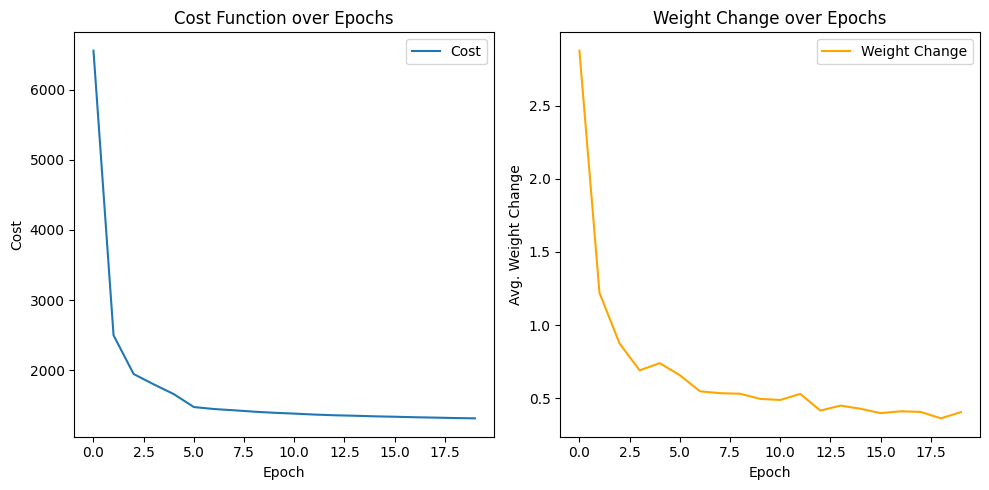

Accuracy: 0.5624074987666502
Confusion Matrix:
 [[1135    0]
 [ 887    5]]


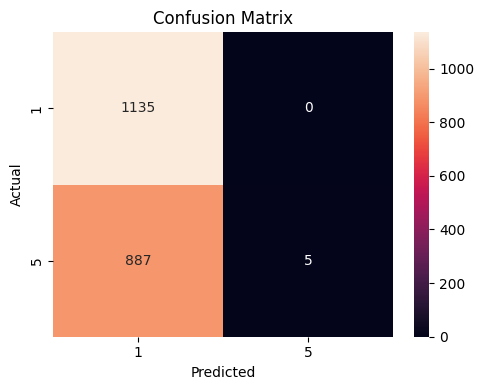

Batch Size: 1000, Learning Rate: 0.001, Hidden Layers: [500, 250, 50]
Epoch 1/20, Cost: 7648.582207440855, Avg. Weight Change: 2.5483571852710445
Epoch 2/20, Cost: 4148.538665831611, Avg. Weight Change: 1.2017774318861667
Epoch 3/20, Cost: 3158.9925132752614, Avg. Weight Change: 1.073875726659024
Epoch 4/20, Cost: 2576.721061027936, Avg. Weight Change: 0.7380021006894353
Epoch 5/20, Cost: 2349.2291588031435, Avg. Weight Change: 0.785795525484459
Epoch 6/20, Cost: 2234.8842797556786, Avg. Weight Change: 0.5772082718602882
Epoch 7/20, Cost: 2202.7101427529687, Avg. Weight Change: 0.5963224676642191
Epoch 8/20, Cost: 2033.9922718441371, Avg. Weight Change: 0.5932404318324658
Epoch 9/20, Cost: 1922.0312907113325, Avg. Weight Change: 0.4889437278758625
Epoch 10/20, Cost: 1750.6187147095811, Avg. Weight Change: 0.6288742231861225
Epoch 11/20, Cost: 1650.5926322713296, Avg. Weight Change: 0.4909169325138634
Epoch 12/20, Cost: 1636.7848609446228, Avg. Weight Change: 0.49745303804028096
Epoch 1

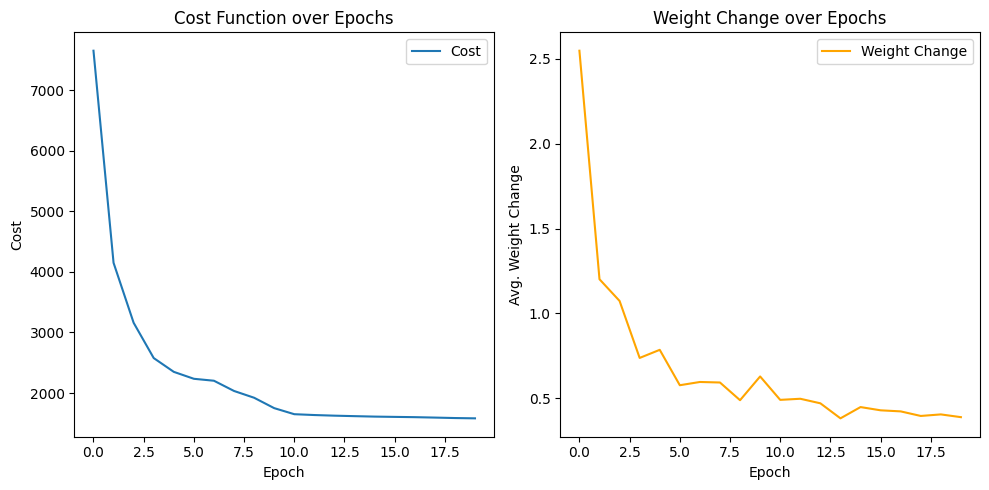

Accuracy: 0.5599407992106561
Confusion Matrix:
 [[1135    0]
 [ 892    0]]


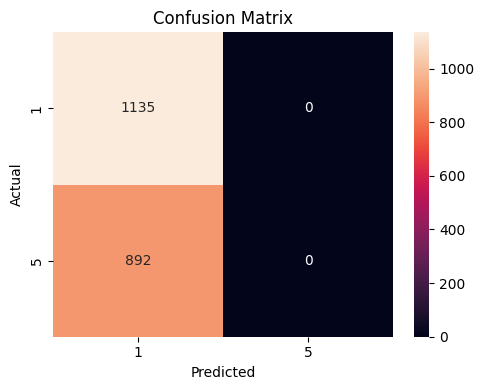

Batch Size: 1000, Learning Rate: 0.001, Hidden Layers: [500, 250, 50]
Epoch 1/20, Cost: 5988.896279797065, Avg. Weight Change: 2.9071518382280845
Epoch 2/20, Cost: 2032.4956761172668, Avg. Weight Change: 1.1536945144193296
Epoch 3/20, Cost: 1636.5603068617477, Avg. Weight Change: 0.9174306531068651
Epoch 4/20, Cost: 1533.499573688827, Avg. Weight Change: 0.7111165829666752
Epoch 5/20, Cost: 1493.580682265354, Avg. Weight Change: 0.5816924067536378
Epoch 6/20, Cost: 1461.7426255822393, Avg. Weight Change: 0.6141397744504491
Epoch 7/20, Cost: 1436.3327672019839, Avg. Weight Change: 0.5506508950005042
Epoch 8/20, Cost: 1419.046630929353, Avg. Weight Change: 0.5427230056044521
Epoch 9/20, Cost: 1278.6486885275817, Avg. Weight Change: 0.5784426741858506
Epoch 10/20, Cost: 1055.1262270414563, Avg. Weight Change: 0.5688532957574596
Epoch 11/20, Cost: 919.9995449390203, Avg. Weight Change: 0.555762681489155
Epoch 12/20, Cost: 791.2134144280533, Avg. Weight Change: 0.5501224636702896
Epoch 13/2

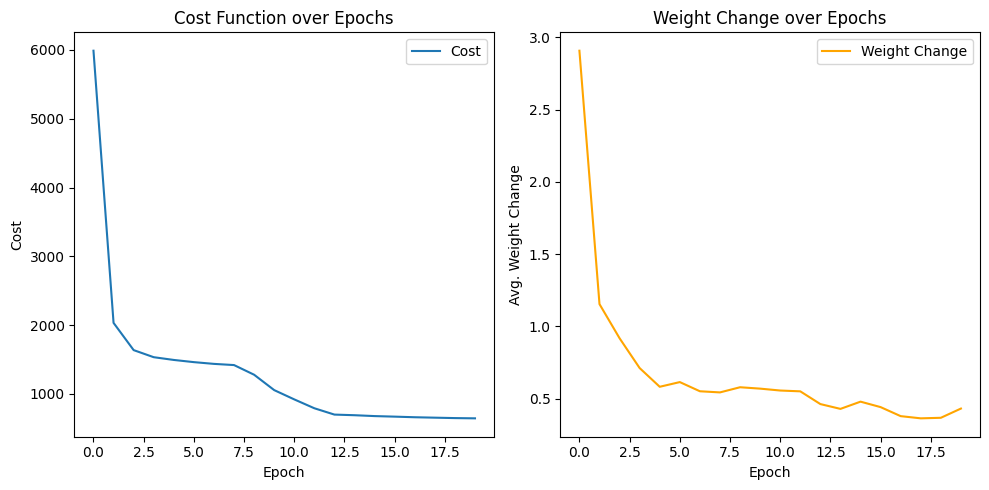

Accuracy: 0.9832264430192402
Confusion Matrix:
 [[1134    1]
 [  33  859]]


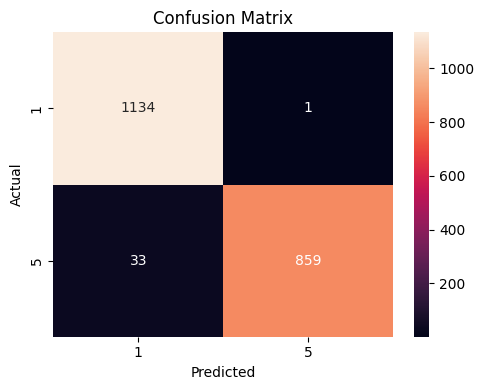

Batch Size: 1000, Learning Rate: 0.001, Hidden Layers: [500, 250, 50]
Epoch 1/20, Cost: 7572.535307010801, Avg. Weight Change: 2.688145943214449
Epoch 2/20, Cost: 4094.207604603915, Avg. Weight Change: 1.4029471960582474
Epoch 3/20, Cost: 3460.7324259065276, Avg. Weight Change: 0.9549399649734853
Epoch 4/20, Cost: 3136.313047010729, Avg. Weight Change: 0.8066712310205989
Epoch 5/20, Cost: 2922.8687946723103, Avg. Weight Change: 0.6227459107376807
Epoch 6/20, Cost: 2880.13535526227, Avg. Weight Change: 0.6055666481493269
Epoch 7/20, Cost: 2853.810675358588, Avg. Weight Change: 0.617651928413954
Epoch 8/20, Cost: 2836.5903031463818, Avg. Weight Change: 0.577193737683013
Epoch 9/20, Cost: 2819.534170421685, Avg. Weight Change: 0.556184457489374
Epoch 10/20, Cost: 2806.2229082903013, Avg. Weight Change: 0.49983712555568793
Epoch 11/20, Cost: 2795.5492481828123, Avg. Weight Change: 0.4859662345210094
Epoch 12/20, Cost: 2787.3609840396475, Avg. Weight Change: 0.47455563092954367
Epoch 13/20,

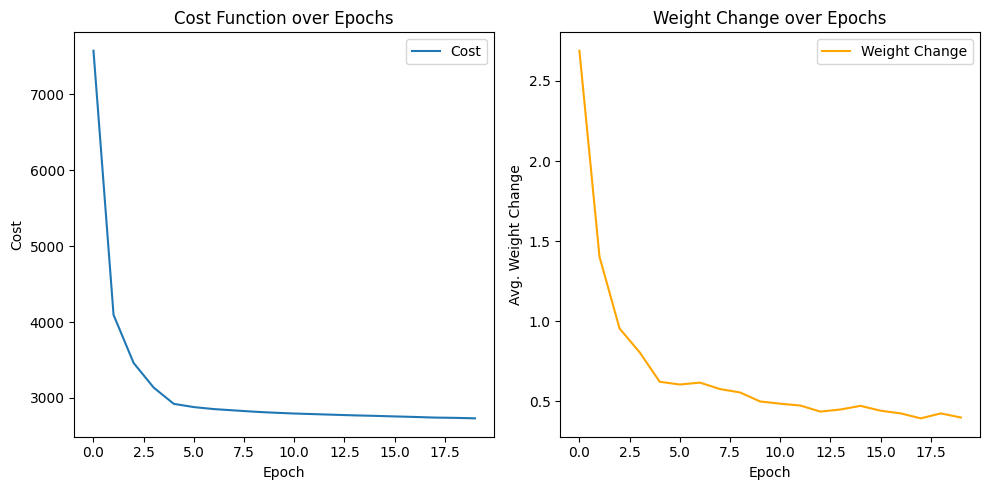

Accuracy: 0.36655155402072026
Confusion Matrix:
 [[719 416]
 [868  24]]


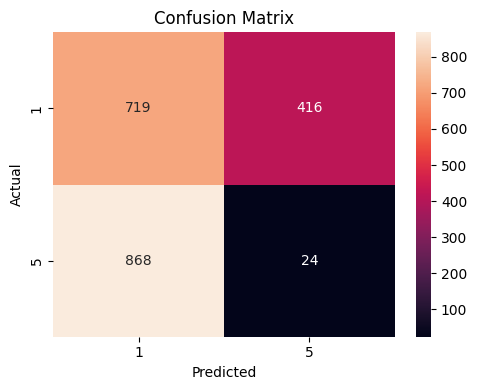

Batch Size: 1000, Learning Rate: 0.01, Hidden Layers: [500, 250, 50]
Epoch 1/20, Cost: 6831.281379816881, Avg. Weight Change: 14.910963733539443
Epoch 2/20, Cost: 3343.6125750274396, Avg. Weight Change: 3.0834700921482305
Epoch 3/20, Cost: 2674.025489546858, Avg. Weight Change: 4.028203587013334
Epoch 4/20, Cost: 2410.9992361631575, Avg. Weight Change: 1.8489759955189529
Epoch 5/20, Cost: 2373.043209826752, Avg. Weight Change: 2.2643489796200855
Epoch 6/20, Cost: 2364.704373613676, Avg. Weight Change: 1.8711479548516823
Epoch 7/20, Cost: 2338.3054756924766, Avg. Weight Change: 1.6696888700701957
Epoch 8/20, Cost: 2344.0111136577107, Avg. Weight Change: 2.173242766296516
Epoch 9/20, Cost: 2322.3464678682167, Avg. Weight Change: 2.2441059927085707
Epoch 10/20, Cost: 2302.5946328352447, Avg. Weight Change: 1.8862725618383414
Epoch 11/20, Cost: 2294.608900091404, Avg. Weight Change: 1.0888048572796822
Epoch 12/20, Cost: 2310.6161453502823, Avg. Weight Change: 2.3647335213096983
Epoch 13/20

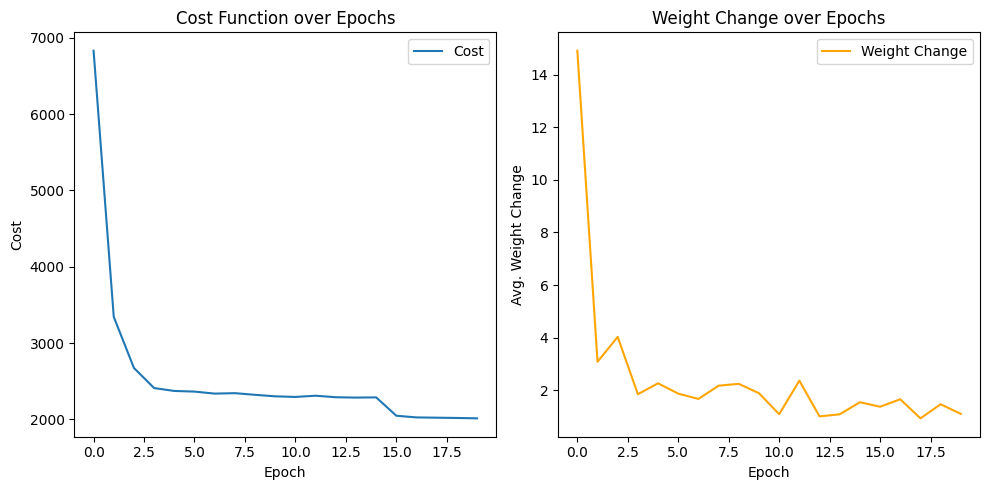

Accuracy: 0.5584607794770597
Confusion Matrix:
 [[1132    3]
 [ 892    0]]


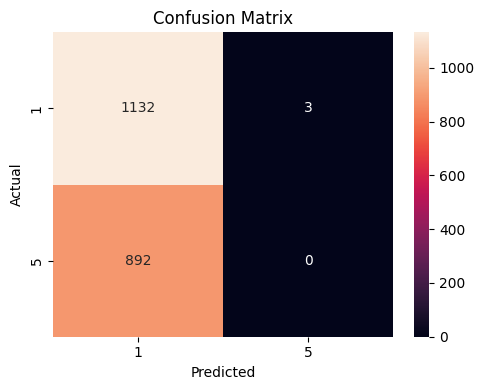

Batch Size: 1000, Learning Rate: 0.01, Hidden Layers: [500, 250, 50]
Epoch 1/20, Cost: 9116.574134733124, Avg. Weight Change: 13.56657584257723
Epoch 2/20, Cost: 5407.608749346856, Avg. Weight Change: 4.391395866354252
Epoch 3/20, Cost: 4877.141788572819, Avg. Weight Change: 2.974519792382588
Epoch 4/20, Cost: 4581.260306949752, Avg. Weight Change: 4.847482719001122
Epoch 5/20, Cost: 3245.6857528652404, Avg. Weight Change: 4.5584412254681
Epoch 6/20, Cost: 2453.3561315232128, Avg. Weight Change: 3.085373964228332
Epoch 7/20, Cost: 2096.7858977156584, Avg. Weight Change: 2.432828543982332
Epoch 8/20, Cost: 1967.9692981770988, Avg. Weight Change: 2.068400640171927
Epoch 9/20, Cost: 1642.4504468231041, Avg. Weight Change: 2.501579097210199
Epoch 10/20, Cost: 1490.3489139673416, Avg. Weight Change: 1.8274010590696514
Epoch 11/20, Cost: 1241.7319063909022, Avg. Weight Change: 1.712827066644568
Epoch 12/20, Cost: 1035.8885775216668, Avg. Weight Change: 1.5055558449202588
Epoch 13/20, Cost: 1

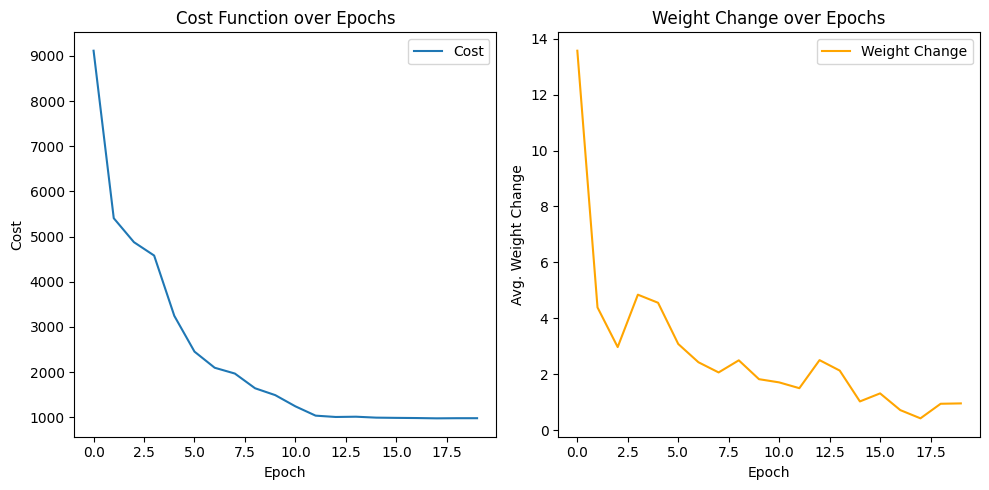

Accuracy: 0.44055254070054267
Confusion Matrix:
 [[   1 1134]
 [   0  892]]


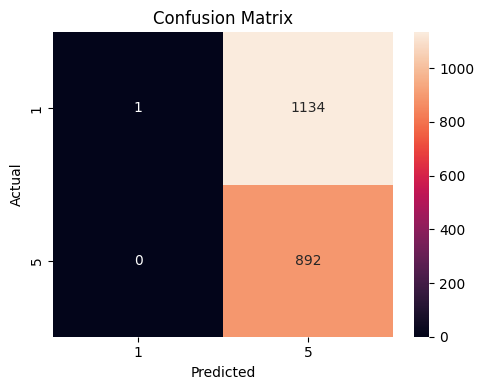

Batch Size: 1000, Learning Rate: 0.01, Hidden Layers: [500, 250, 50]
Epoch 1/20, Cost: 6998.031043342383, Avg. Weight Change: 17.83511362404605
Epoch 2/20, Cost: 3572.8454858410123, Avg. Weight Change: 2.829083256959551
Epoch 3/20, Cost: 3268.2241907047433, Avg. Weight Change: 2.3105674990566767
Epoch 4/20, Cost: 2807.2558804507516, Avg. Weight Change: 2.8971013995618127
Epoch 5/20, Cost: 2730.094415064557, Avg. Weight Change: 2.6013173128638813
Epoch 6/20, Cost: 2714.8516552537553, Avg. Weight Change: 1.9068008954427262
Epoch 7/20, Cost: 2566.5712949778963, Avg. Weight Change: 1.5311873472543243
Epoch 8/20, Cost: 2480.466610940932, Avg. Weight Change: 1.8805437817269062
Epoch 9/20, Cost: 2465.7609388159403, Avg. Weight Change: 1.3093347531565163
Epoch 10/20, Cost: 2451.799808893401, Avg. Weight Change: 2.5814624598688436
Epoch 11/20, Cost: 2123.9332749178147, Avg. Weight Change: 1.7749724913875409
Epoch 12/20, Cost: 1985.985565855077, Avg. Weight Change: 1.1217765199905116
Epoch 13/20

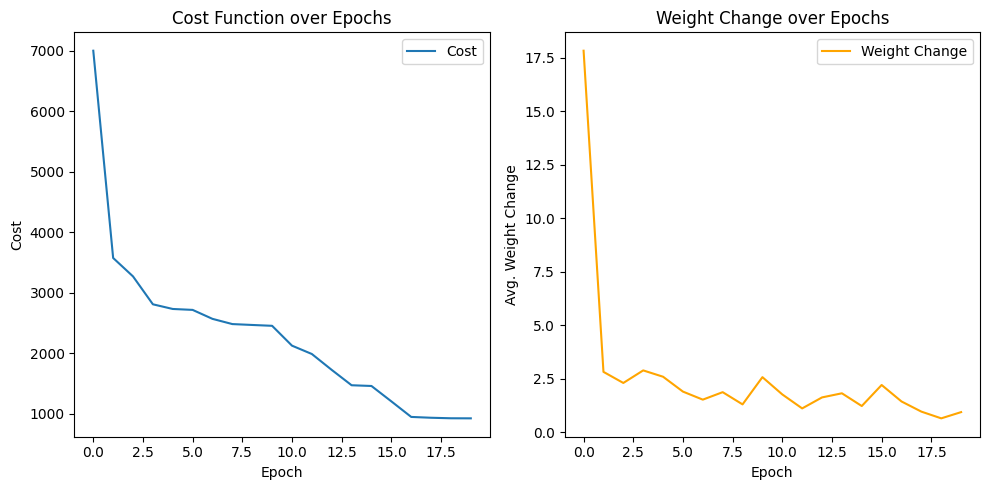

Accuracy: 0.0014800197335964479
Confusion Matrix:
 [[   3 1132]
 [ 892    0]]


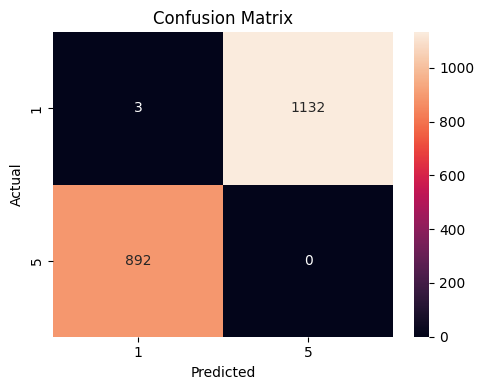

Batch Size: 1000, Learning Rate: 0.01, Hidden Layers: [500, 250, 50]
Epoch 1/20, Cost: 8134.988608092934, Avg. Weight Change: 16.06059910253995
Epoch 2/20, Cost: 5288.764463103877, Avg. Weight Change: 3.8406931980274965
Epoch 3/20, Cost: 4956.358647406917, Avg. Weight Change: 1.875678945874852
Epoch 4/20, Cost: 4914.125690085666, Avg. Weight Change: 1.70506522162415
Epoch 5/20, Cost: 4890.288367682296, Avg. Weight Change: 2.0466357111016706
Epoch 6/20, Cost: 4681.540016429269, Avg. Weight Change: 1.8736759120005497
Epoch 7/20, Cost: 4651.789447197593, Avg. Weight Change: 1.6580142247852103
Epoch 8/20, Cost: 4103.66569809922, Avg. Weight Change: 1.815438499059481
Epoch 9/20, Cost: 3862.2766149523204, Avg. Weight Change: 1.9448544945983905
Epoch 10/20, Cost: 3848.182447748519, Avg. Weight Change: 1.6962967217503766
Epoch 11/20, Cost: 3500.321853422759, Avg. Weight Change: 1.1981418309028886
Epoch 12/20, Cost: 3347.5103261312743, Avg. Weight Change: 1.6328291713435819
Epoch 13/20, Cost: 3

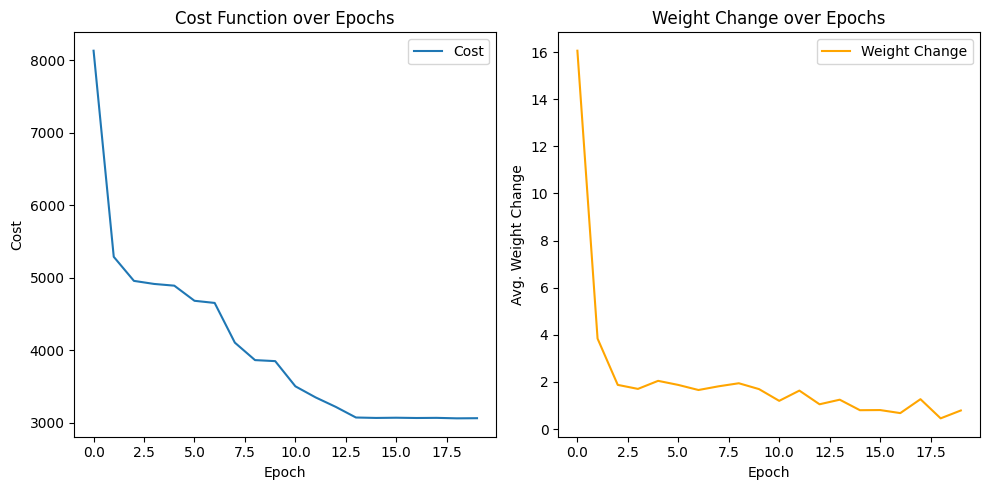

Accuracy: 0.5535273803650715
Confusion Matrix:
 [[1122   13]
 [ 892    0]]


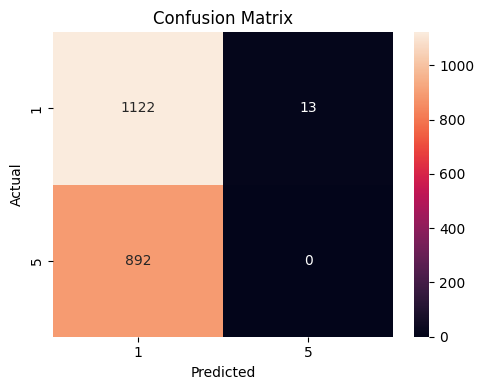

Batch Size: 2000, Learning Rate: 0.001, Hidden Layers: [500, 250, 50]
Epoch 1/20, Cost: 14838.9012172932, Avg. Weight Change: 4.328945069613609
Epoch 2/20, Cost: 7824.129958195318, Avg. Weight Change: 1.9205458080492654
Epoch 3/20, Cost: 5828.9802392953925, Avg. Weight Change: 1.4335208335044154
Epoch 4/20, Cost: 4926.526130871023, Avg. Weight Change: 1.076061130732168
Epoch 5/20, Cost: 4786.079709826861, Avg. Weight Change: 0.807747052217725
Epoch 6/20, Cost: 4480.043134824909, Avg. Weight Change: 1.0796095125332184
Epoch 7/20, Cost: 4297.326807466364, Avg. Weight Change: 0.6926175558728049
Epoch 8/20, Cost: 4259.720928382608, Avg. Weight Change: 0.7208010311265989
Epoch 9/20, Cost: 4229.463634853241, Avg. Weight Change: 0.6290237071549887
Epoch 10/20, Cost: 4206.123314815454, Avg. Weight Change: 0.5780220746507782
Epoch 11/20, Cost: 4114.817812087224, Avg. Weight Change: 0.8019968905789625
Epoch 12/20, Cost: 3824.146351542685, Avg. Weight Change: 0.6153425457894557
Epoch 13/20, Cost:

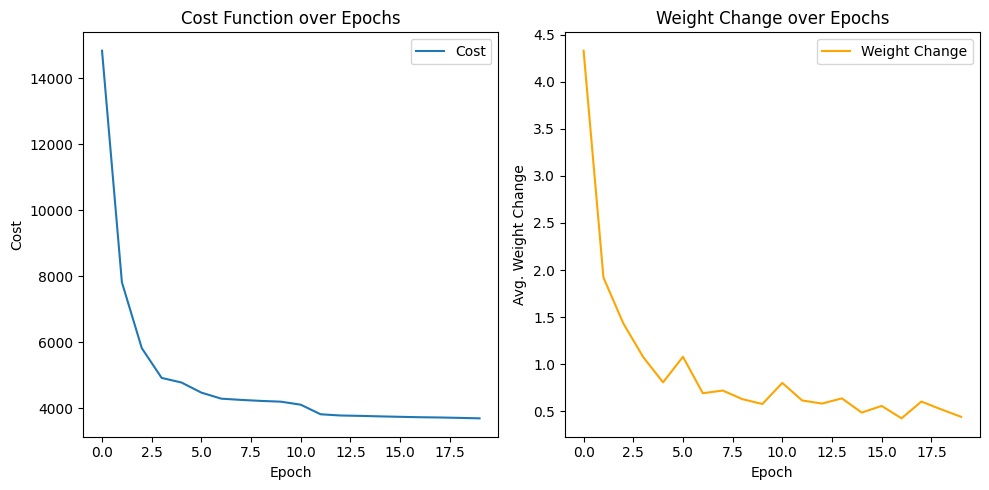

Accuracy: 0.43808584114454857
Confusion Matrix:
 [[   1 1134]
 [   5  887]]


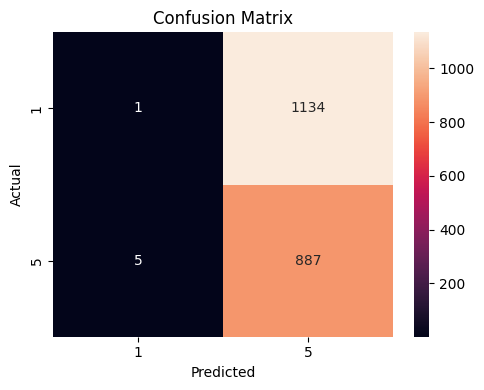

Batch Size: 2000, Learning Rate: 0.001, Hidden Layers: [500, 250, 50]
Epoch 1/20, Cost: 13215.358090881122, Avg. Weight Change: 4.361434485916101
Epoch 2/20, Cost: 5742.789324082246, Avg. Weight Change: 2.0348498275369162
Epoch 3/20, Cost: 4359.414473291443, Avg. Weight Change: 1.282839191647635
Epoch 4/20, Cost: 3321.115893673735, Avg. Weight Change: 1.1575550672045996
Epoch 5/20, Cost: 3072.916237600544, Avg. Weight Change: 0.8108786016910925
Epoch 6/20, Cost: 3013.194431975302, Avg. Weight Change: 0.7637521670456362
Epoch 7/20, Cost: 2975.540826564333, Avg. Weight Change: 0.6742949515137974
Epoch 8/20, Cost: 2941.4892324825864, Avg. Weight Change: 0.6606066042374149
Epoch 9/20, Cost: 2908.9039512844965, Avg. Weight Change: 0.7990996741208788
Epoch 10/20, Cost: 2567.0908165417895, Avg. Weight Change: 0.6778336778690637
Epoch 11/20, Cost: 2499.68532447029, Avg. Weight Change: 0.6177260766399701
Epoch 12/20, Cost: 2481.3333122042363, Avg. Weight Change: 0.5963983114856786
Epoch 13/20, 

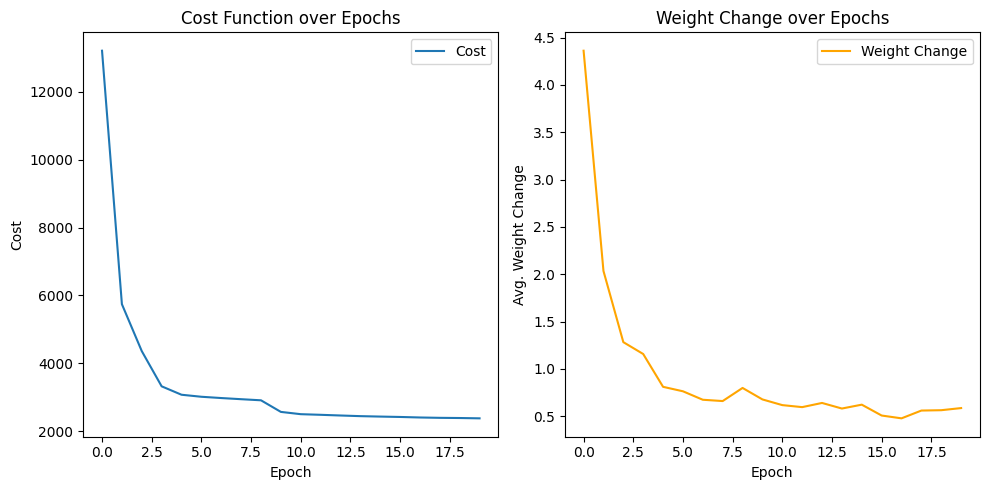

Accuracy: 0.44005920078934385
Confusion Matrix:
 [[   0 1135]
 [   0  892]]


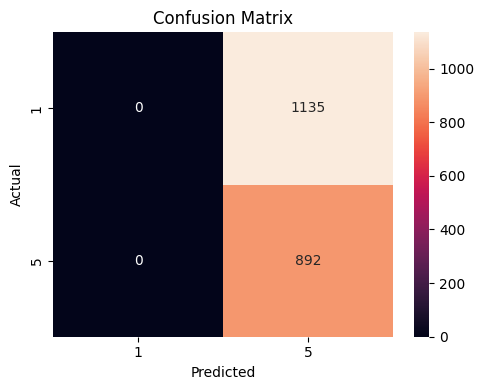

Batch Size: 2000, Learning Rate: 0.001, Hidden Layers: [500, 250, 50]
Epoch 1/20, Cost: 14774.194054597594, Avg. Weight Change: 5.4127930073676485
Epoch 2/20, Cost: 5770.571007992033, Avg. Weight Change: 2.05039462803287
Epoch 3/20, Cost: 4163.205122167455, Avg. Weight Change: 1.1730765777534284
Epoch 4/20, Cost: 3754.049646454066, Avg. Weight Change: 0.8517261122151122
Epoch 5/20, Cost: 3641.3232947737383, Avg. Weight Change: 0.8005899927710429
Epoch 6/20, Cost: 3463.5088349872044, Avg. Weight Change: 0.8900051558853809
Epoch 7/20, Cost: 3177.86157556291, Avg. Weight Change: 0.712953772884504
Epoch 8/20, Cost: 3128.817226195807, Avg. Weight Change: 0.7171944930323447
Epoch 9/20, Cost: 3013.7173046350536, Avg. Weight Change: 0.760192010316875
Epoch 10/20, Cost: 2712.5258429474275, Avg. Weight Change: 0.6083720387886788
Epoch 11/20, Cost: 2690.965077114553, Avg. Weight Change: 0.6842116262763238
Epoch 12/20, Cost: 2658.6782789417084, Avg. Weight Change: 0.6246896040435541
Epoch 13/20, C

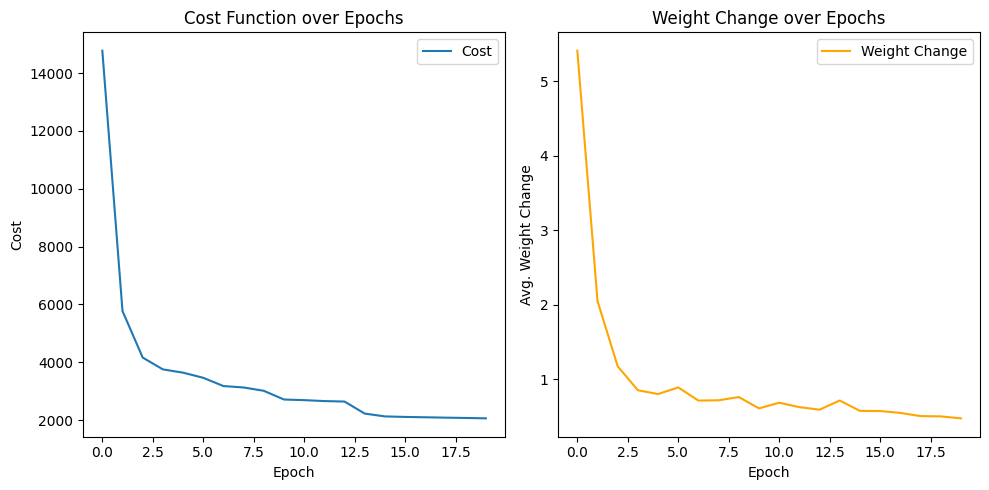

Accuracy: 0.44005920078934385
Confusion Matrix:
 [[   0 1135]
 [   0  892]]


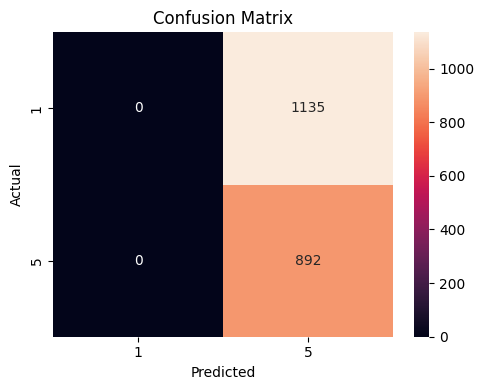

Batch Size: 2000, Learning Rate: 0.001, Hidden Layers: [500, 250, 50]
Epoch 1/20, Cost: 15174.340273597743, Avg. Weight Change: 4.780466284226368
Epoch 2/20, Cost: 7244.368772972147, Avg. Weight Change: 1.6635837919278988
Epoch 3/20, Cost: 6525.216711801421, Avg. Weight Change: 1.0240705977907296
Epoch 4/20, Cost: 6365.334837504155, Avg. Weight Change: 0.9062010390079573
Epoch 5/20, Cost: 6278.212026437331, Avg. Weight Change: 0.7649757868450856
Epoch 6/20, Cost: 6231.4592268124625, Avg. Weight Change: 0.7692843034089327
Epoch 7/20, Cost: 6191.476976771255, Avg. Weight Change: 0.7377908210464547
Epoch 8/20, Cost: 6153.9923072843885, Avg. Weight Change: 0.6887747067760657
Epoch 9/20, Cost: 6122.404315526153, Avg. Weight Change: 0.6198263464427027
Epoch 10/20, Cost: 6104.3638214586745, Avg. Weight Change: 0.6097036702223225
Epoch 11/20, Cost: 6089.816957367351, Avg. Weight Change: 0.5367980127248789
Epoch 12/20, Cost: 6076.612107548237, Avg. Weight Change: 0.568167382232935
Epoch 13/20, 

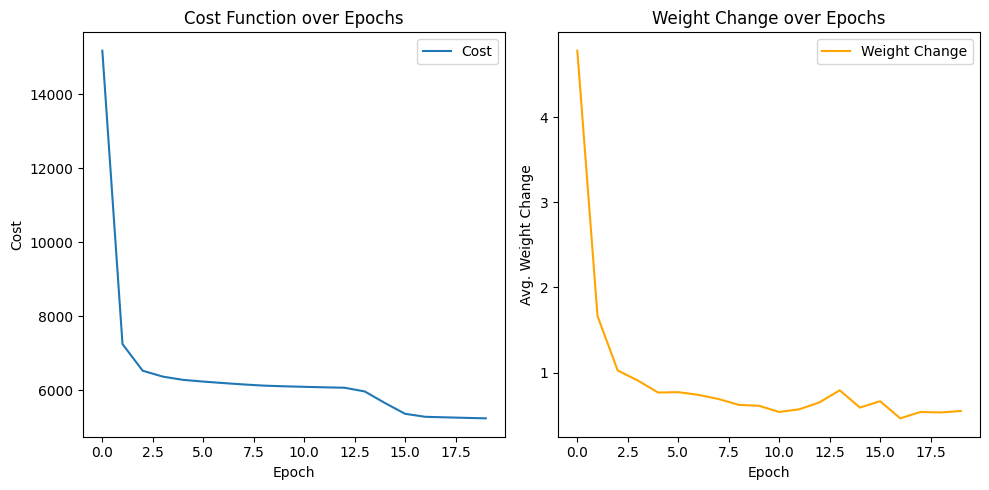

Accuracy: 0.05426739023186976
Confusion Matrix:
 [[   0 1135]
 [ 782  110]]


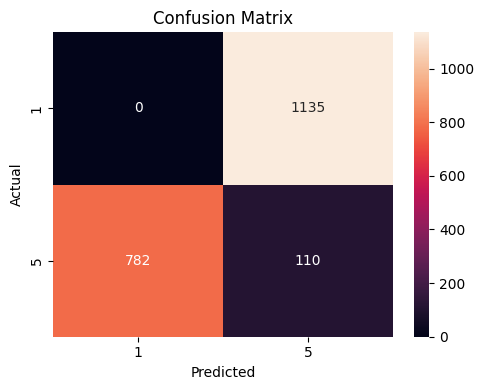

Batch Size: 2000, Learning Rate: 0.01, Hidden Layers: [500, 250, 50]
Epoch 1/20, Cost: 21269.956048922915, Avg. Weight Change: 22.03093956481498
Epoch 2/20, Cost: 21710.608586230817, Avg. Weight Change: 2.813152780752041
Epoch 3/20, Cost: 21698.255063364042, Avg. Weight Change: 1.6585842973279432
Epoch 4/20, Cost: 21918.48941133411, Avg. Weight Change: 1.4839075104591413
Epoch 5/20, Cost: 21591.639521844605, Avg. Weight Change: 9.088475855627136
Epoch 6/20, Cost: 20449.17767683021, Avg. Weight Change: 8.68355600635833
Epoch 7/20, Cost: 18255.083887516208, Avg. Weight Change: 20.861104173074718
Epoch 8/20, Cost: 16047.665932146085, Avg. Weight Change: 4.536215082235304
Epoch 9/20, Cost: 15475.763708296436, Avg. Weight Change: 3.4323801450109976
Epoch 10/20, Cost: 14731.156404384845, Avg. Weight Change: 4.631713167353972
Epoch 11/20, Cost: 13549.740182579737, Avg. Weight Change: 3.061005145458457
Epoch 12/20, Cost: 12858.852576271425, Avg. Weight Change: 1.9476498744123891
Epoch 13/20, C

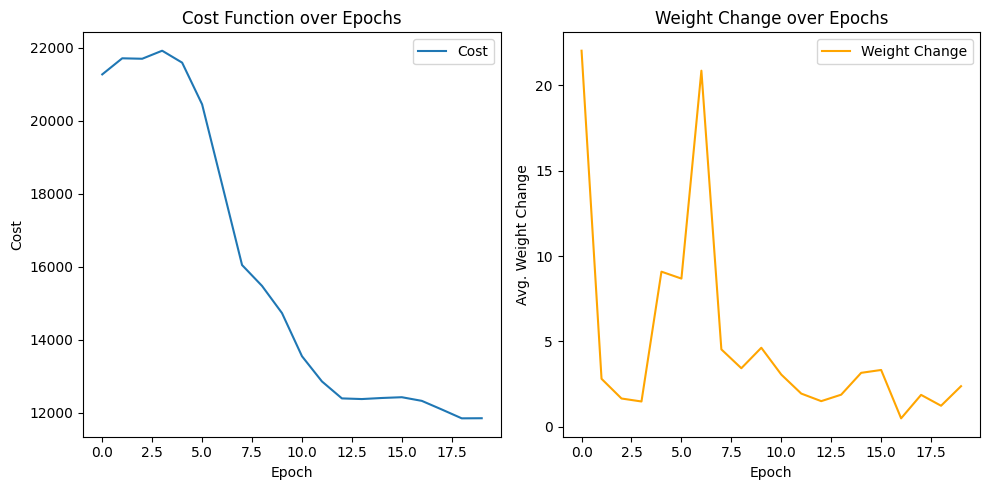

Accuracy: 0.5599407992106561
Confusion Matrix:
 [[1135    0]
 [ 892    0]]


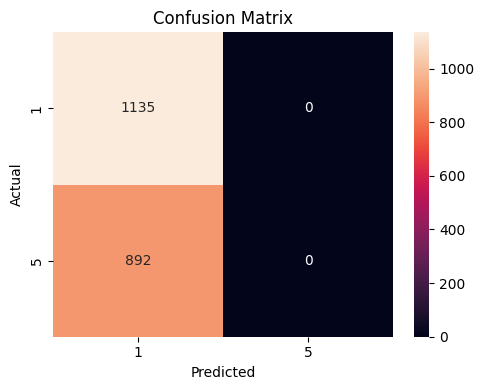

Batch Size: 2000, Learning Rate: 0.01, Hidden Layers: [500, 250, 50]
Epoch 1/20, Cost: 19319.807407830143, Avg. Weight Change: 30.408233077354115
Epoch 2/20, Cost: 15220.82793475471, Avg. Weight Change: 13.960678739126065
Epoch 3/20, Cost: 12795.058197300232, Avg. Weight Change: 7.3370612070574
Epoch 4/20, Cost: 10975.032293032944, Avg. Weight Change: 3.9685760625259503
Epoch 5/20, Cost: 10533.817102267993, Avg. Weight Change: 2.2363683009352466
Epoch 6/20, Cost: 10492.77505213212, Avg. Weight Change: 1.9706621751636197
Epoch 7/20, Cost: 10078.478799574423, Avg. Weight Change: 4.725149080207978
Epoch 8/20, Cost: 8992.301385953611, Avg. Weight Change: 7.0235871275507415
Epoch 9/20, Cost: 8469.292982048239, Avg. Weight Change: 3.7233264867563785
Epoch 10/20, Cost: 7730.478267761878, Avg. Weight Change: 3.2452850564390223
Epoch 11/20, Cost: 7491.271294481099, Avg. Weight Change: 2.981922432030313
Epoch 12/20, Cost: 7294.0243804931815, Avg. Weight Change: 3.139378951334667
Epoch 13/20, Cos

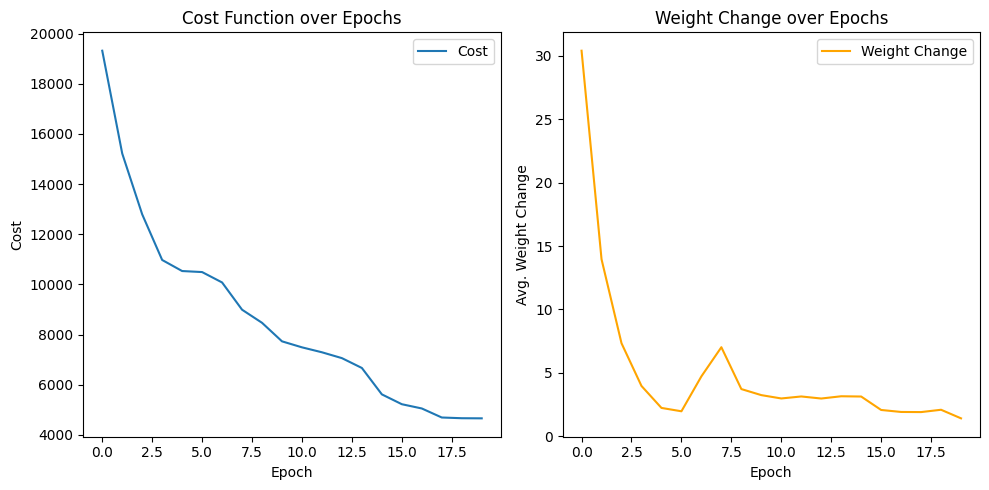

Accuracy: 0.9975333004440059
Confusion Matrix:
 [[1132    3]
 [   2  890]]


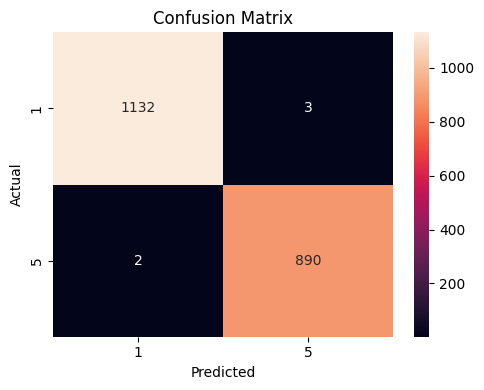

Batch Size: 2000, Learning Rate: 0.01, Hidden Layers: [500, 250, 50]
Epoch 1/20, Cost: 20717.49497303634, Avg. Weight Change: 22.921851417717892
Epoch 2/20, Cost: 17113.60501860843, Avg. Weight Change: 13.833720513748615
Epoch 3/20, Cost: 10285.819754375634, Avg. Weight Change: 7.943681492296606
Epoch 4/20, Cost: 8847.511397194272, Avg. Weight Change: 3.87925499073235
Epoch 5/20, Cost: 7683.459348289302, Avg. Weight Change: 3.207985819947664
Epoch 6/20, Cost: 6657.371414049225, Avg. Weight Change: 7.475383668358622
Epoch 7/20, Cost: 5368.981343856859, Avg. Weight Change: 6.749726747248915
Epoch 8/20, Cost: 3804.832573463877, Avg. Weight Change: 7.576491954133589
Epoch 9/20, Cost: 3158.89825728457, Avg. Weight Change: 1.7021067005198436
Epoch 10/20, Cost: 3120.9563261199332, Avg. Weight Change: 2.5019975970899893
Epoch 11/20, Cost: 3103.906586224396, Avg. Weight Change: 2.469572048325766
Epoch 12/20, Cost: 3071.3127969638595, Avg. Weight Change: 1.6838371371395795
Epoch 13/20, Cost: 305

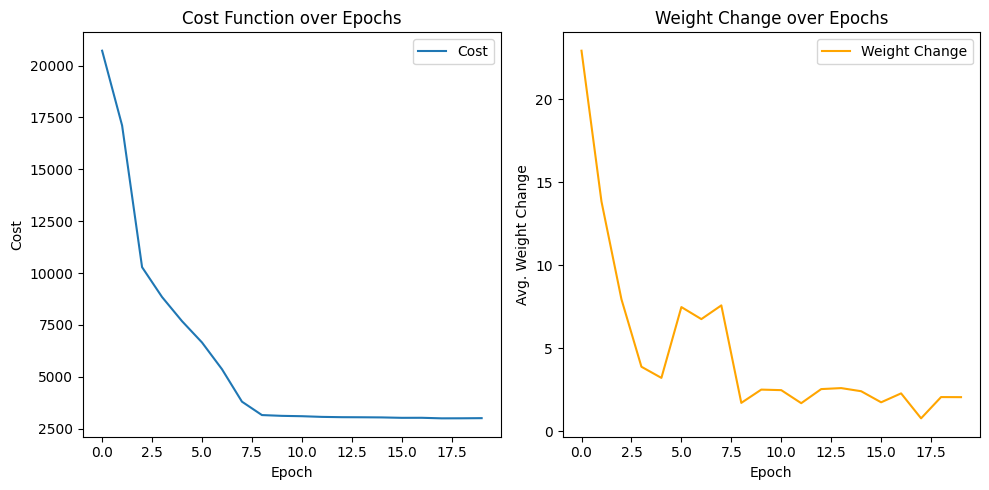

Accuracy: 0.0029600394671928957
Confusion Matrix:
 [[   2 1133]
 [ 888    4]]


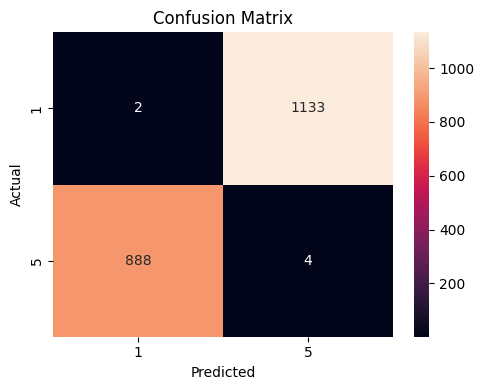

Batch Size: 2000, Learning Rate: 0.01, Hidden Layers: [500, 250, 50]
Epoch 1/20, Cost: 20602.76358791368, Avg. Weight Change: 28.789813701085716
Epoch 2/20, Cost: 21098.25040501035, Avg. Weight Change: 13.815297116044649
Epoch 3/20, Cost: 13863.270908580835, Avg. Weight Change: 26.050136754116902
Epoch 4/20, Cost: 5415.270071130377, Avg. Weight Change: 6.93407508683753
Epoch 5/20, Cost: 5233.7365529504605, Avg. Weight Change: 2.701662508809157
Epoch 6/20, Cost: 5168.304088379993, Avg. Weight Change: 2.929780395135037
Epoch 7/20, Cost: 5090.175003854964, Avg. Weight Change: 3.7296379035570877
Epoch 8/20, Cost: 4973.574932781484, Avg. Weight Change: 5.3210265267425685
Epoch 9/20, Cost: 4555.508721828864, Avg. Weight Change: 3.04387075432708
Epoch 10/20, Cost: 4547.763379130681, Avg. Weight Change: 2.811165008176779
Epoch 11/20, Cost: 4567.20915149921, Avg. Weight Change: 1.752120817032884
Epoch 12/20, Cost: 4501.615115063391, Avg. Weight Change: 2.1331183127763667
Epoch 13/20, Cost: 4518

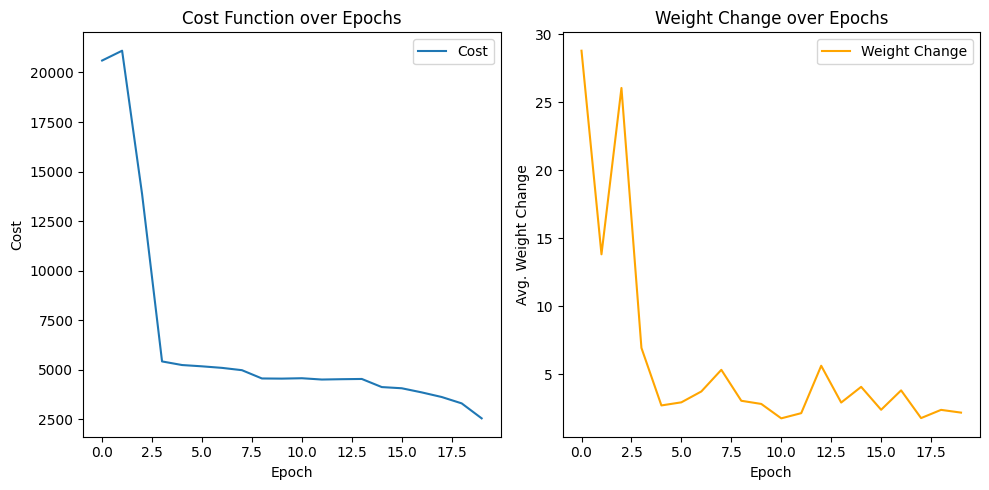

Accuracy: 0.44005920078934385
Confusion Matrix:
 [[   0 1135]
 [   0  892]]


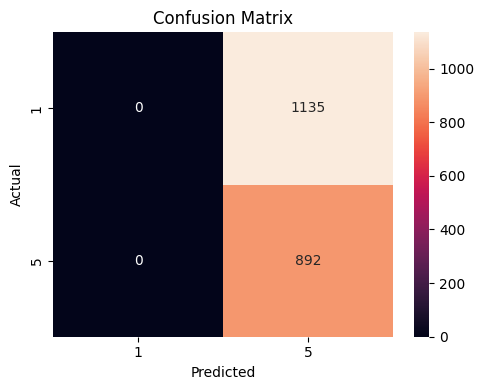

Best Accuracy: 0.9975333004440059
Best Hyperparameters: {'batch_size': 2000, 'eta': 0.01, 'hidden_layers': [500, 250, 50]}


In [812]:
# Test the model
batch_sizes = [1000,2000]
etas = [0.001,0.01]
hidden_layers_list = [[500, 250, 50],[500, 250, 50],[500, 250, 50],[500, 250, 50]]


best_accuracy = 0
best_params = {}

for batch_size in batch_sizes:
    for eta in etas:
        for hidden_layers in hidden_layers_list:
            print(f"Batch Size: {batch_size}, Learning Rate: {eta}, Hidden Layers: {hidden_layers}")
            model = NNet(batch_size=batch_size, hidden_layers=hidden_layers)
            # Train the model
            model = train_NNet(train_X_1_5, train_class_1_5, epochs=20, batch_size=batch_size, eta=eta)
            # Test the model
            accuracy, Y_predicted = test_model(test_X_1_5, test_class_1_5, model, d1, d2)
            print(f"Accuracy: {accuracy}")
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    'batch_size': batch_size,
                    'eta': eta,
                    'hidden_layers': hidden_layers
                }

            conf_matrix = confusion_matrix(test_class_1_5, Y_predicted, labels=[0, 1])
            print("Confusion Matrix:\n", conf_matrix)  
            
            plt.figure(figsize=(5, 4))  
            sns.heatmap(conf_matrix, annot=True, fmt="g",xticklabels=[1, 5], yticklabels=[1, 5])
            plt.title('Confusion Matrix')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')

            plt.tight_layout()
            plt.show()

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Hyperparameters: {best_params}")


## Confusion Matrix Analysis:
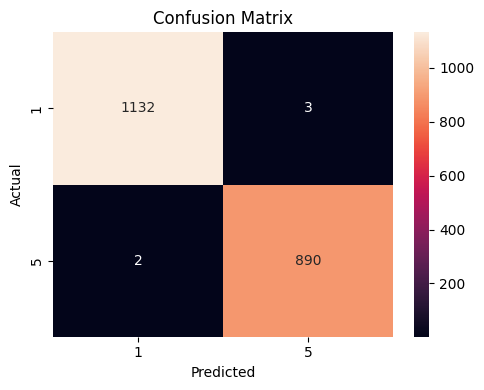

The confusion matrix illustrates the classification performance of a neural network model trained to distinguish between the digits **1** and **5** using the best hyperparameters.

### Matrix Overview:
- True Positives for Class 1 (1132): The model is very good at identifying instances of class 1.
- True Positives for Class 5 (890): Similarly, the model performs very well for class 5.
- False Positives (3) and False Negatives (2) are minimal, indicating that the model is highly confident and accurate in its predictions.

### Observations:
- The model performs well, with high true positives for both classes.
- There are very few misclassifications, showing that the model is highly accurate.

### Potential Reasons for This Behavior:

- Class imbalance: There may not be a strong class imbalance, as the counts are relatively close for both classes.
- Well-trained model: The low number of errors suggests the model has generalized well to the dataset, possibly due to good training, proper feature selection, and an optimized algorithm.
- Choice of algorithm: The algorithm might have a strong decision boundary between these two classes, resulting in minimal overlap and hence few misclassifications.

### Training Plots and Analysis:

When training with different hyperparameters, the following observations can be made from the training procedure plots:

- Batch Size Impact: Larger batch sizes tend to result in smoother training curves, but they may also converge slower. The batch size of 2000 strikes a good balance between training time and stable convergence.
- Learning Rate Impact: A higher learning rate leads to faster convergence initially, but risks overshooting the optimal parameters, causing oscillations in both training and validation losses. The best learning rate (0.01) shows a consistent decrease in loss, indicating that the model is converging to a good solution.
- Hidden Layers: The architecture with [500, 250, 50] hidden layers provides enough capacity for the model to learn complex patterns, but avoids overfitting, which can be seen by the minimal gap between training and validation loss curves.



### When d1 = 1 & d2 = 7

In [814]:
# Define the digits to extract
d1, d2 = 1, 7

# Extract the digits from the training and testing sets
train_X_1_7, train_y_1_7 = extract_digits(train_X, train_y, d1, d2)
test_X_1_7, test_y_1_7 = extract_digits(test_X, test_y, d1, d2)

# Vectorize the images
train_X_1_7 = vectorize_images(train_X_1_7)
test_X_1_7 = vectorize_images(test_X_1_7)

# Create the binary labels
train_class_1_7 = np.where(train_y_1_7 == d1, 0, 1)
test_class_1_7 = np.where(test_y_1_7 == d1, 0, 1)

Batch Size: 2000, Learning Rate: 0.01, Hidden Layers: [500, 250, 50]
Epoch 1/20, Cost: 21107.12145277759, Avg. Weight Change: 35.685492092295064
Epoch 2/20, Cost: 15672.927773181904, Avg. Weight Change: 6.542628444396386
Epoch 3/20, Cost: 13290.876721234183, Avg. Weight Change: 2.704007928931528
Epoch 4/20, Cost: 12972.6936904871, Avg. Weight Change: 3.4605042745202264
Epoch 5/20, Cost: 12934.507927439297, Avg. Weight Change: 2.7030320142087314
Epoch 6/20, Cost: 12911.540321433948, Avg. Weight Change: 1.666534181167004
Epoch 7/20, Cost: 12678.75593851689, Avg. Weight Change: 3.886000311581519
Epoch 8/20, Cost: 12052.311736472262, Avg. Weight Change: 2.123942616042103
Epoch 9/20, Cost: 11562.586136780223, Avg. Weight Change: 1.8410257146757458
Epoch 10/20, Cost: 11417.602990664154, Avg. Weight Change: 2.048530744198959
Epoch 11/20, Cost: 11402.328293241531, Avg. Weight Change: 1.497641784006596
Epoch 12/20, Cost: 11053.188537832993, Avg. Weight Change: 2.602602045419094
Epoch 13/20, Cos

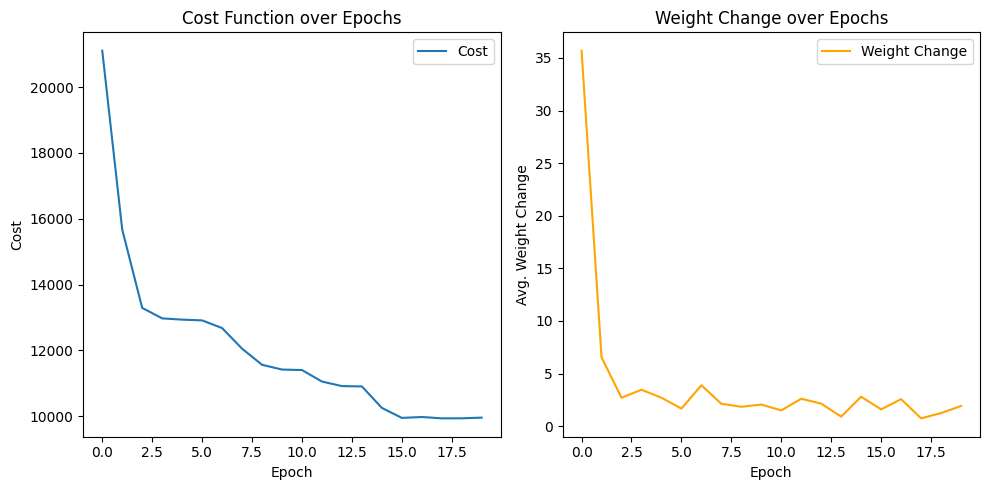

Accuracy: 0.9819694868238558
Confusion Matrix:
 [[1135    0]
 [  39  989]]


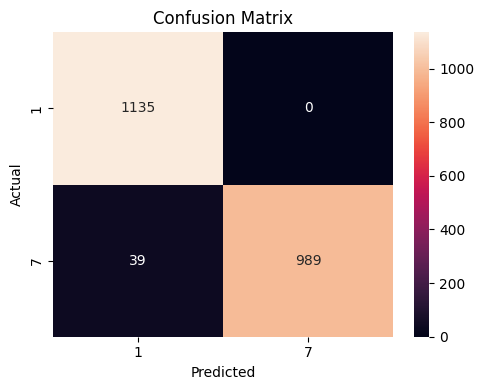

In [823]:
# Test the model
batch_sizes = [2000]
etas = [0.01]
hidden_layers_list = [[500, 250, 50]]


best_accuracy = 0
best_params = {}

for batch_size in batch_sizes:
    for eta in etas:
        for hidden_layers in hidden_layers_list:
            print(f"Batch Size: {batch_size}, Learning Rate: {eta}, Hidden Layers: {hidden_layers}")
            model = NNet(batch_size=batch_size, hidden_layers=hidden_layers)
            # Train the model
            model = train_NNet(train_X_1_7, train_class_1_7, epochs=20, batch_size=batch_size, eta=eta)
            # Test the model
            accuracy, Y_predicted = test_model(test_X_1_7, test_class_1_7, model, d1, d2)
            print(f"Accuracy: {accuracy}")
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    'batch_size': batch_size,
                    'eta': eta,
                    'hidden_layers': hidden_layers
                }

            conf_matrix = confusion_matrix(test_class_1_7, Y_predicted, labels=[0, 1])
            print("Confusion Matrix:\n", conf_matrix)  
            
            plt.figure(figsize=(5, 4))  
            sns.heatmap(conf_matrix, annot=True, fmt="g",xticklabels=[1, 7], yticklabels=[1, 7])
            plt.title('Confusion Matrix')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')

            plt.tight_layout()
            plt.show()




## Confusion Matrix Analysis for Digits 1 and 7

### Hyperparameters:
- `batch_size`: 2000
- `eta`: 0.01
- `hidden_layers`: [500, 250, 50]

### Confusion Matrix for Digits 1 and 7:
- **True Positives for Digit 1 (1135)**: The model perfectly classifies all instances of digit 1, as there are no false negatives.
- **True Positives for Digit 7 (989)**: The model classifies most of the digit 7 instances correctly, though there are some misclassifications.
- **False Positives (39)**: The model incorrectly classifies 39 instances of digit 7 as digit 1.
- **False Negatives (0)**: There are no false negatives for digit 1 (digit 1 is never misclassified as digit 7).


### Observations:
- **Accuracy for Digit 1**: The model performs consistently well in both confusion matrices for digit 1, with very high true positive counts and minimal errors. In the case of digit 7, it perfectly identifies all instances of digit 1, whereas it misclassified two instances when digit 5 was involved.
  
- **Confusion for Digit 7 vs. Digit 5**:
  - The model shows **more difficulty distinguishing between digits 1 and 7** (with 39 misclassifications of digit 7 as digit 1), compared to distinguishing between digits 1 and 5 (only 3 misclassifications).
  - This could suggest that digit 7 shares more similar features with digit 1 than digit 5 does, which might explain the higher misclassification rate.

### Reasoning for Differences:
- **Similarities in Feature Space**: Digits 1 and 7 might share more overlapping features (e.g., vertical strokes or shapes in certain cases), leading to a higher false positive rate. The model seems to have a more challenging time distinguishing these two digits.
  
- **Digits 1 and 5** seem to have more distinctive features, as indicated by the lower error rate (3 false positives vs. 39 for digit 7). The model can differentiate them more effectively.

